
=== TREND [logic, lr=0.01] ===


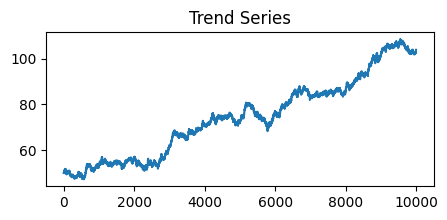

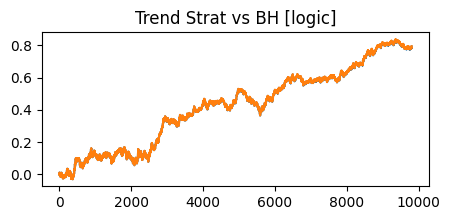

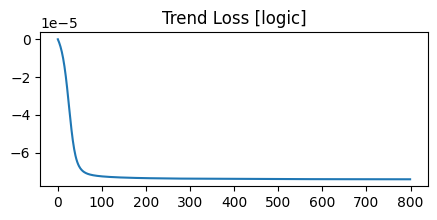


=== SWITCH [logic+feature, lr=0.001] ===


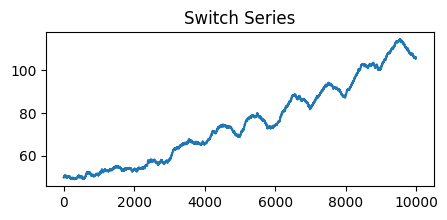

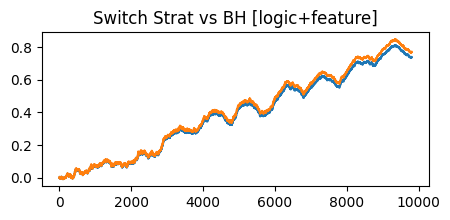

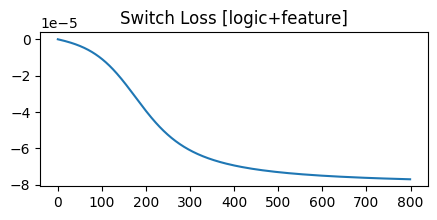


=== FLAT [all, lr=0.01] ===


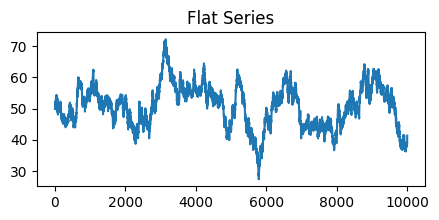

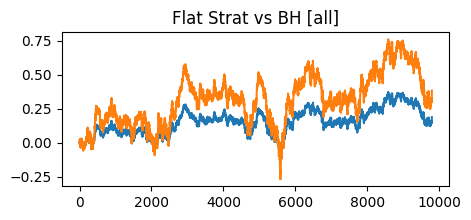

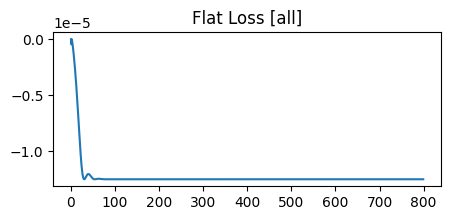

,Variant,LR,Sharpe
Regime,,,
trend,logic,0.010,0.445495
switch,logic+feature,0.001,0.863354
flat,all,0.010,0.060846


In [1]:
import pandas as pd
from evaluate import evaluate_synthetic

window_short, window_long = 50, 200
beta   = 10.0
epochs = 800

# paper‐faithful mapping
regime_cfg = {
  'trend':  ('logic',         0.01),
  'switch': ('logic+feature', 0.001),
  'flat':   ('all',           0.01),
}

results = []
for regime,(variant,lr) in regime_cfg.items():
    print(f"\n=== {regime.upper()} [{variant}, lr={lr}] ===")
    sr = evaluate_synthetic(
        regime=regime,
        window_short=window_short,
        window_long=window_long,
        variant=variant,
        beta=beta,
        lr=lr,
        epochs=epochs,
        plot=True
    )
    results.append((regime, variant, lr, sr))

df = pd.DataFrame(results, columns=['Regime','Variant','LR','Sharpe'])\
       .set_index('Regime')
display(df)
